In [15]:
import pandas as pd
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

In [16]:
Italy = Italy = pd.read_excel('countries.xlsx', sheet_name='Italy')
Italy = Italy.transpose()
Italy.columns = Italy.iloc[0]
Italy = Italy.drop(Italy.index[0])
Italy.reset_index(level=0, inplace=True)
Italy = Italy.rename(columns={'index' : 'time'})
#Italy  = Italy[['active']]

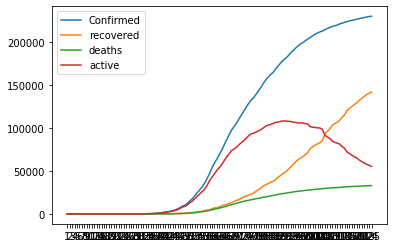

In [17]:
#plt.figure(figsize=(10,7))
plt.plot(Italy['time'],Italy['Confirmed'],label='Confirmed')
plt.plot(Italy['time'],Italy['recovered'],label='recovered')
plt.plot(Italy['time'],Italy['deaths'],label='deaths')
#plt.plot(Italy['time'],Italy['Susceptible'])
plt.plot(Italy['time'],Italy['active'],label='active')
plt.legend()

In [18]:
def SEIRD(t,y,b,g,p,n,q,k,N,m):
    S = y[1]
    E = y[2]
    I = y[3]
    T = y[4]
    R = y[5]

    dSdt = ((-b*S*(I+E))/N) + (m*R)
    dEdt = ((b*S*(I+E))/N) - (k*E)
    dIdt = (k*E)-(g*p*I)
    dTdt = (g*p*I)-(n*T)
    dRdt = n*q*T - (m*R)
    dDdt = (g*(1-p)*I)+(n*(1-q)*T)
    dydt = np.array([dSdt, dEdt, dIdt, dTdt, dRdt, dDdt])
    return dydt

In [19]:
#t = [0:122]
N = 60479424
S = 60479417
I = 4
D = 0 
E = 3 
R = 0
T = 0
#yyo = zeros(7,2)
y0 = np.array([S,E,I,T,R,D])
b=0.4 
g = 0.6 
p = 1 
n = 0.5 
q = 1 
k = 0.5
m = 0.1

In [20]:
y = ode(SEIDR(t,y,b,g,p,n,q,k,N,m),[i-1,i],y0)

NameError: name 'SEIDR' is not defined

In [ ]:
for i=1:120
    N = sum(y0);
    y = OdeSolver(SEIDR(t,y,b,g,p,n,q,k,N,m),[i-1,i],y0)
    y0=y[-1,:]';
yyo(:,i) = [y0; N];